In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
data = pd.read_csv('./fifa23dataset/male_players (legacy).csv', dtype='object')
features = ["overall", "potential", "age", "value_eur", "pace", "shooting", "passing", "dribbling", "defending", "physic"]
data = data[features]


In [4]:
data[features] = data[features].apply(pd.to_numeric, errors='coerce')

# Handle missing values only for numeric columns
data[features] = data[features].fillna(data.mean())

In [5]:
data["value_eur"].describe()

count    1.615830e+05
mean     2.326770e+06
std      5.967471e+06
min      1.000000e+03
25%      3.250000e+05
50%      7.500000e+05
75%      1.900000e+06
max      1.940000e+08
Name: value_eur, dtype: float64

In [6]:
# Apply log transformation to target variable if it is skewed
data["value_eur"] = np.log1p(data["value_eur"])


In [7]:
# Separate features and target
X = data.drop("value_eur", axis=1)
y = data["value_eur"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Feature Selection (try different values for k)
k_values = [5, 10, 15]  # Experiment with different numbers of features
best_mse = float('inf')
best_k = 0

for k in k_values:
    selector = SelectKBest(f_regression, k=k)
    X_selected = selector.fit_transform(X_scaled, y)
    selected_features = [X.columns[i] for i in selector.get_support(indices=True)]
    print(f"Selected Features with k={k}: {selected_features}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regression model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model performance
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error with k={k}: {mse}")

    # Track the best k based on MSE
    if mse < best_mse:
        best_mse = mse
        best_k = k

print(f"Best k value: {best_k} with MSE: {best_mse}")


Selected Features with k=5: ['overall', 'potential', 'shooting', 'passing', 'dribbling']
Mean Squared Error with k=5: 0.1817458540646776
Selected Features with k=10: ['overall', 'potential', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']


c:\Users\prjwl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


Mean Squared Error with k=10: 0.12003390857693474
Selected Features with k=15: ['overall', 'potential', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']


c:\Users\prjwl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=15 is greater than n_features=9. All the features will be returned.
  warnings.warn(


Mean Squared Error with k=15: 0.12003390857693474
Best k value: 10 with MSE: 0.12003390857693474


In [9]:
# Use the best k value for final model
selector = SelectKBest(f_regression, k=best_k)
X_selected = selector.fit_transform(X_scaled, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Final Mean Squared Error: {mse}")


c:\Users\prjwl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


Final Mean Squared Error: 0.12003390857693474


In [19]:
# Example feature values for prediction
input_data = {
    "overall": 87,
    "potential": 87,
    "age": 28,
    "pace": 79,
    "shooting": 61,
    "passing": 71,
    "dribbling": 66,
    "defending": 87,
    "physic": 82
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Scale the input features using the same scaler
input_scaled = scaler.transform(input_df)

# Select the same features used during training
input_selected = selector.transform(input_scaled)

# Make predictions using the trained model
predicted_value = model.predict(input_selected)

# If log transformation was applied, convert back
predicted_value = np.expm1(predicted_value)

print(f"Predicted Market Value: {predicted_value[0]}")


Predicted Market Value: 34158187.05345791


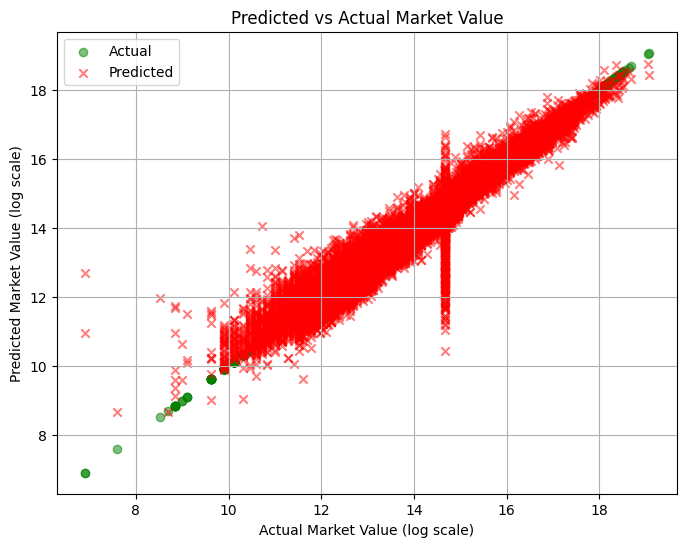

In [23]:
import matplotlib.pyplot as plt

# Plotting y_pred vs y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='green', label='Actual', marker='o', alpha=0.5)
plt.scatter(y_test, y_pred, color='red', label='Predicted', marker='x', alpha=0.5)
plt.title('Predicted vs Actual Market Value')
plt.xlabel('Actual Market Value (log scale)')
plt.ylabel('Predicted Market Value (log scale)')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
def predict_market_value(input_data):
    
    # Example feature values for prediction
    input_df = pd.DataFrame([input_data])

    # Scale the input features using the same scaler
    input_scaled = scaler.transform(input_df)

    # Select the same features used during training
    input_selected = selector.transform(input_scaled)

    # Make predictions using the trained model
    predicted_value = model.predict(input_selected)

    # If log transformation was applied, convert back
    predicted_value = np.expm1(predicted_value)

    return predicted_value[0]


# Test the function with an example input
input_data = {
    "overall": 87,
    "potential": 87,
    "age": 28,
    "pace": 79,
    "shooting": 61,
    "passing": 71,
    "dribbling": 66,
    "defending": 87,
    "physic": 82
}

ans = predict_market_value(input_data)
print(ans)

34158187.05345791
